<a href="https://colab.research.google.com/github/Venkatpotla33/Machine-Learning-Lab/blob/main/ML_Lab_03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering

Task 02: Using Elbow technique, find the optimal number of clusters K

In [ ]:
# Import All Requried Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


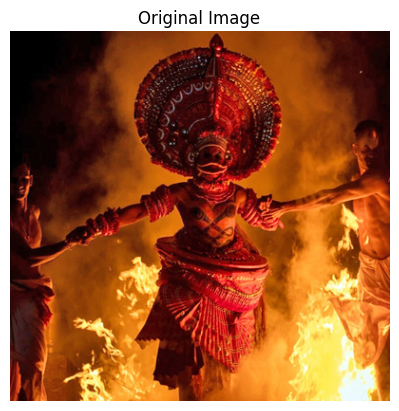

In [ ]:
# Load image
from google.colab import drive
drive.mount('/content/drive')

image_path = '/content/drive/My Drive/theyyam.jpg'
image = io.imread(image_path)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

In [ ]:
# Reshape the image to a 2D array of pixels (rows: pixels, columns: RGB values)
pixels = image.reshape(-1, 3)

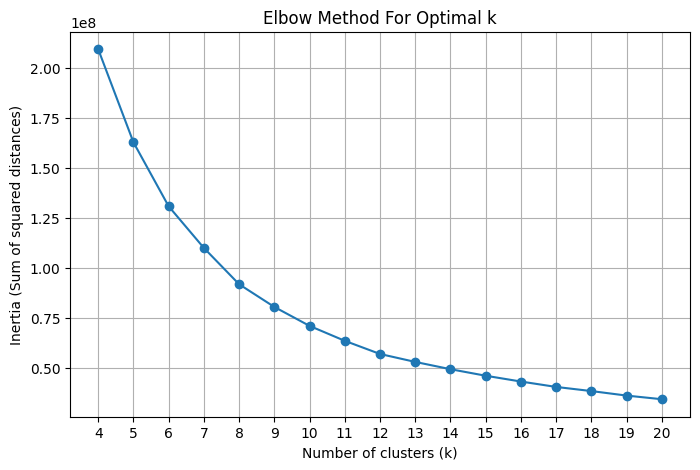

In [ ]:
# Step 1: Use Elbow Method to determine optimal k
inertia = []
K_range = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] # Try k values specified by the user

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pixels)
    inertia.append(kmeans.inertia_)


# Step 2: Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

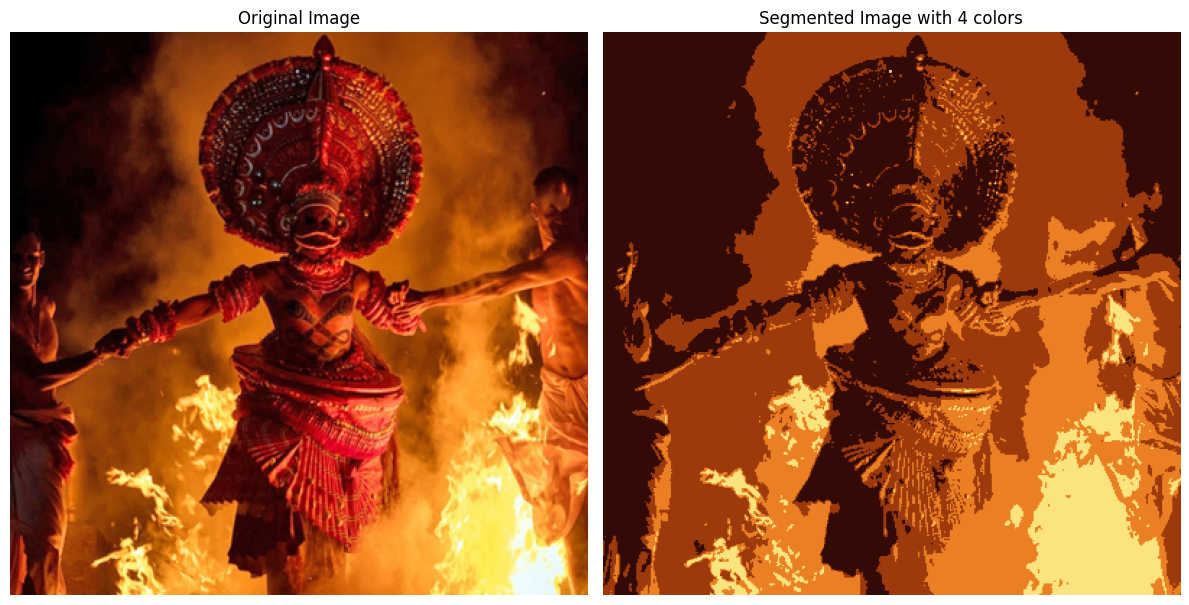

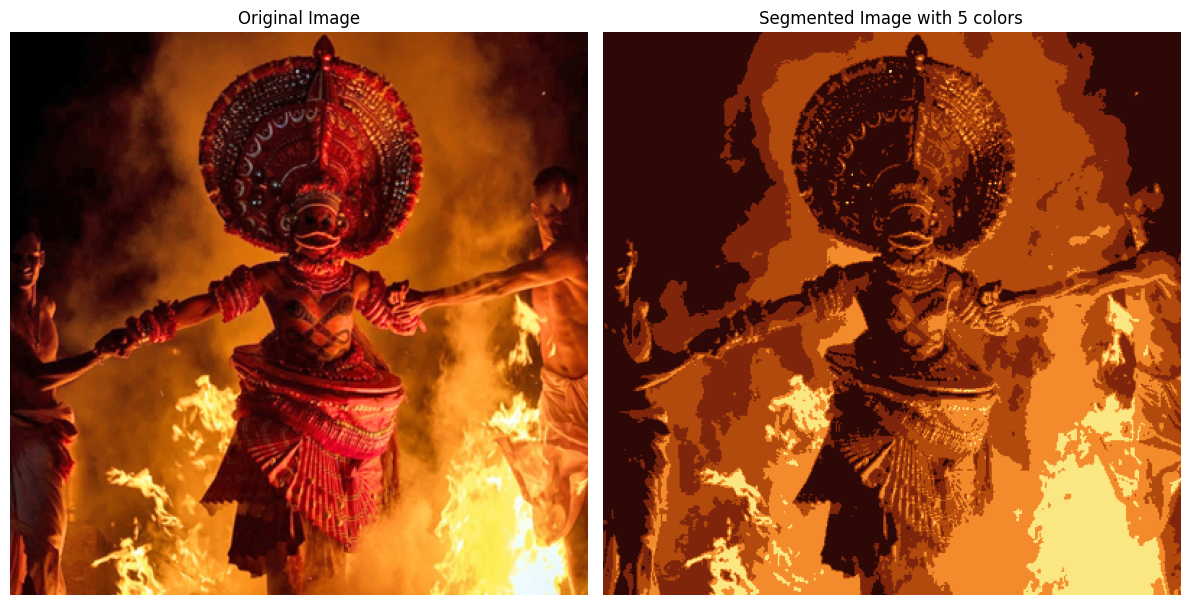

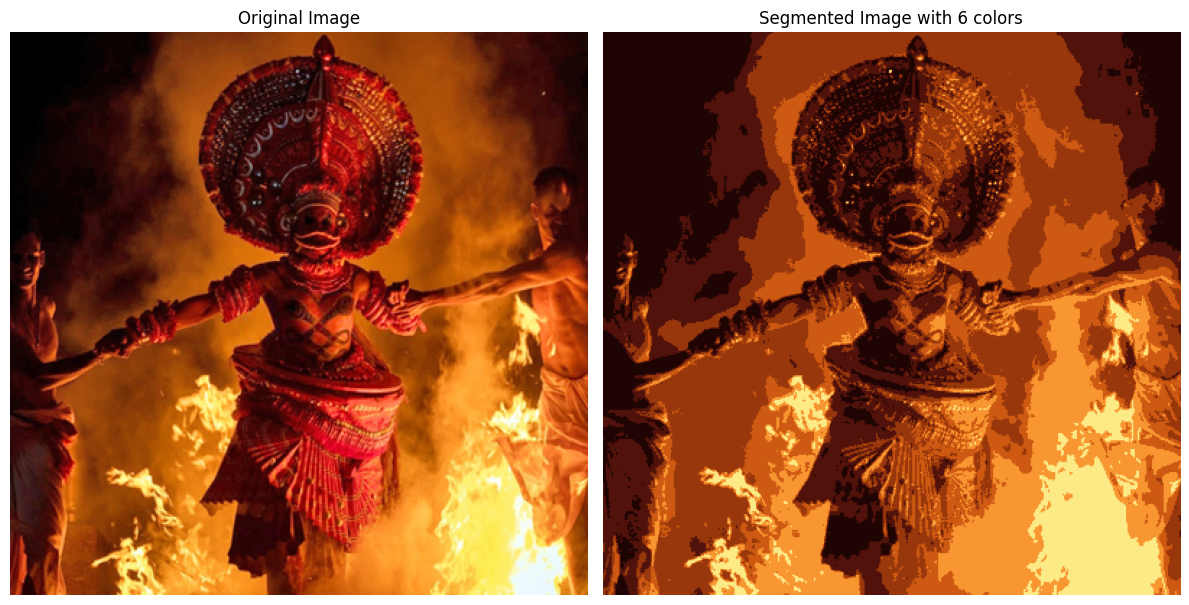

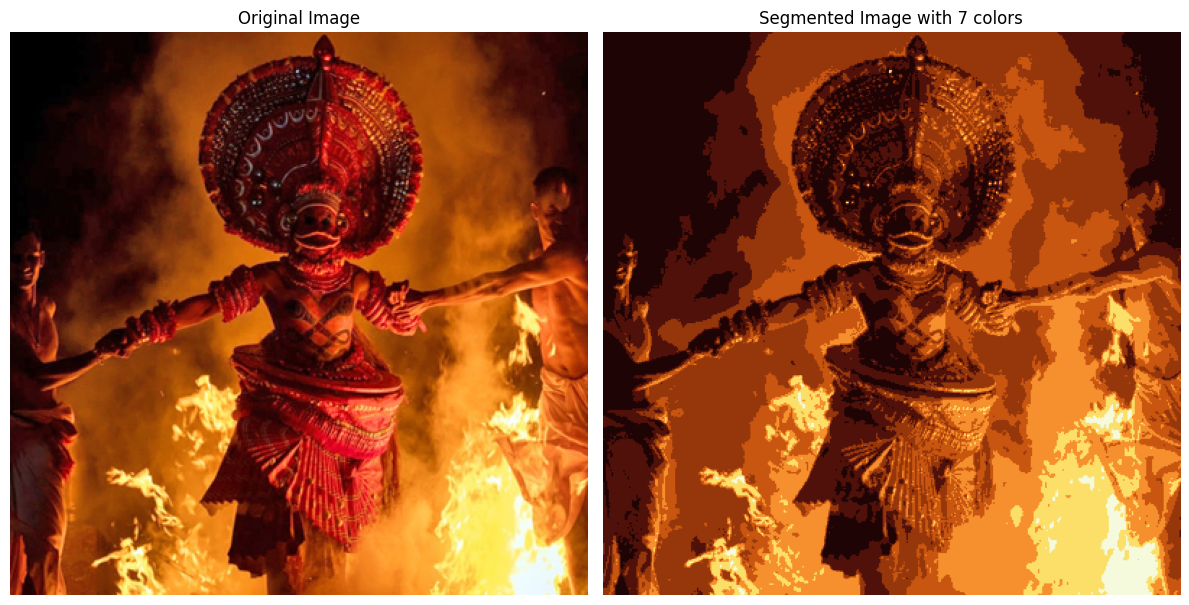

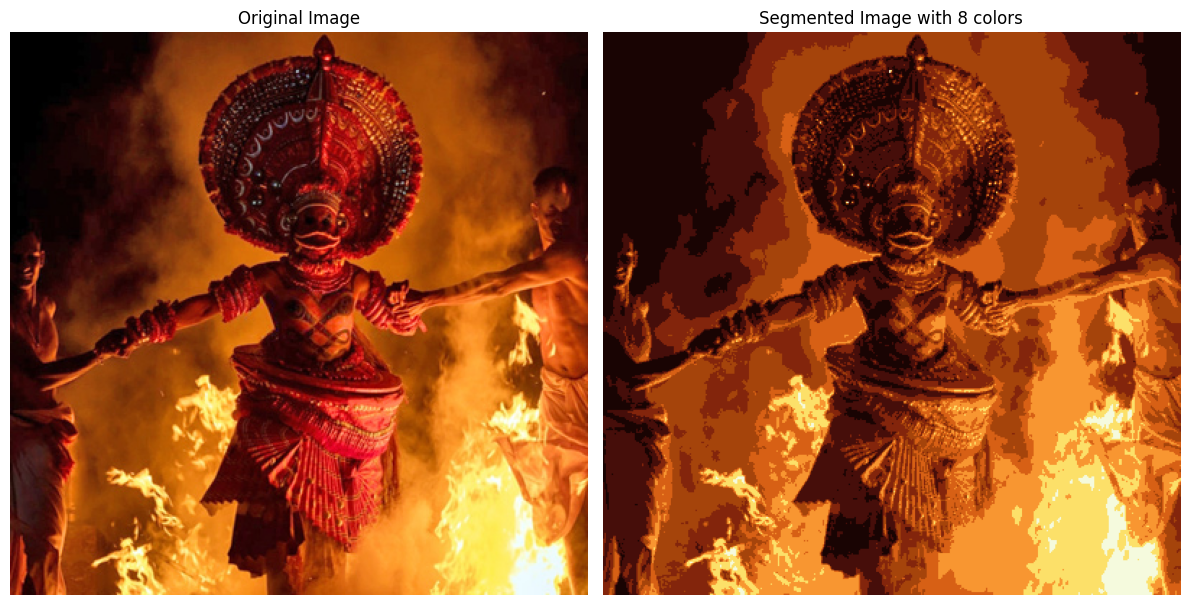

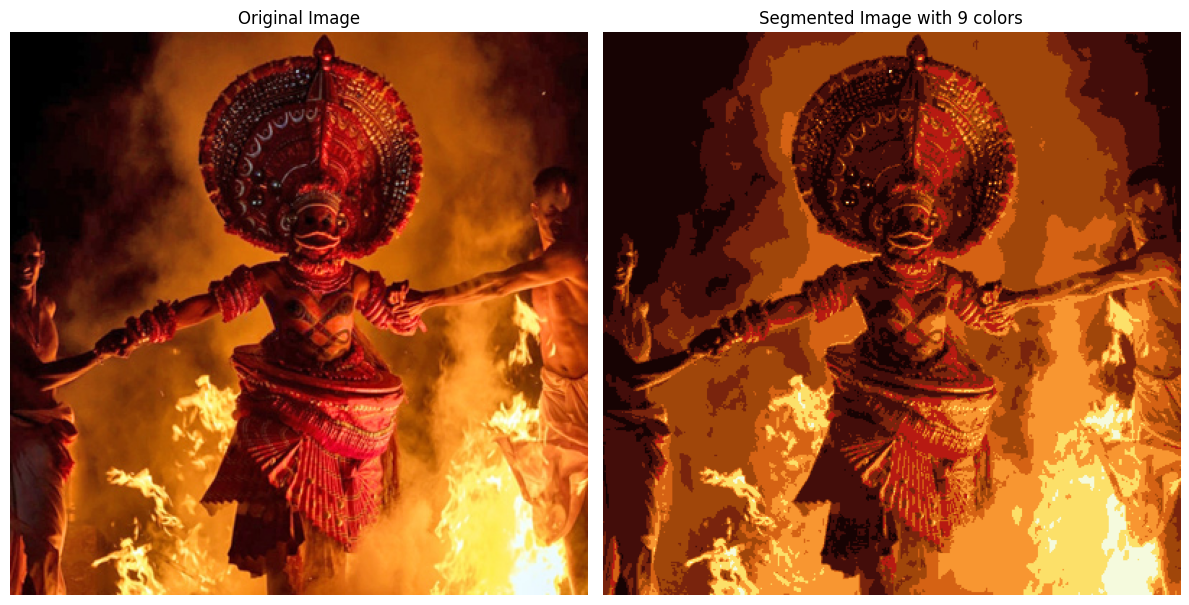

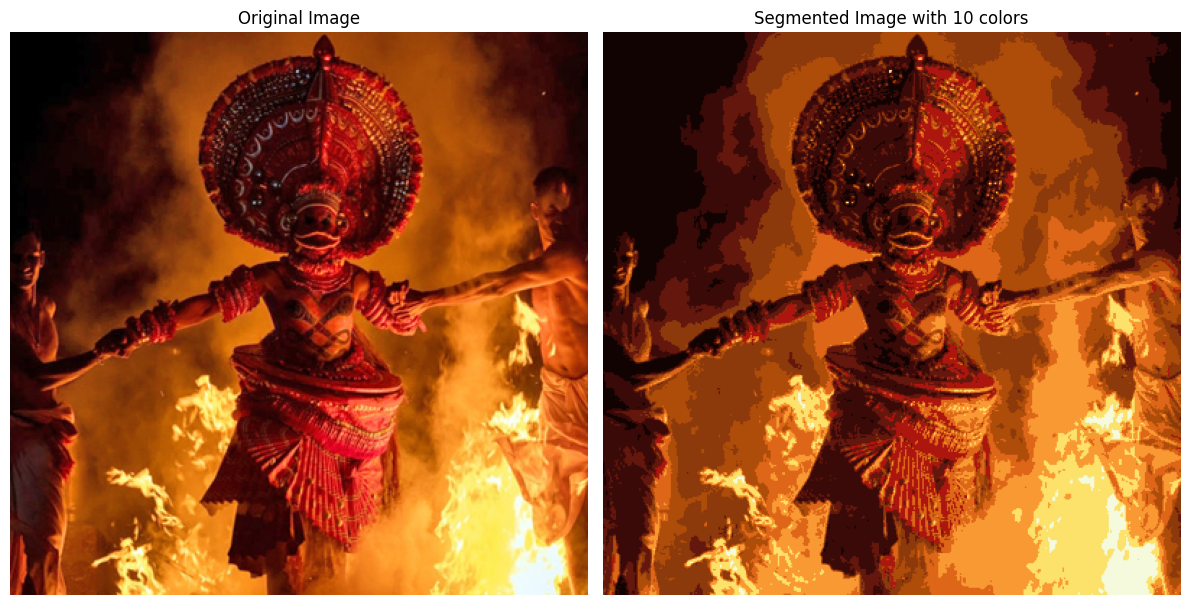

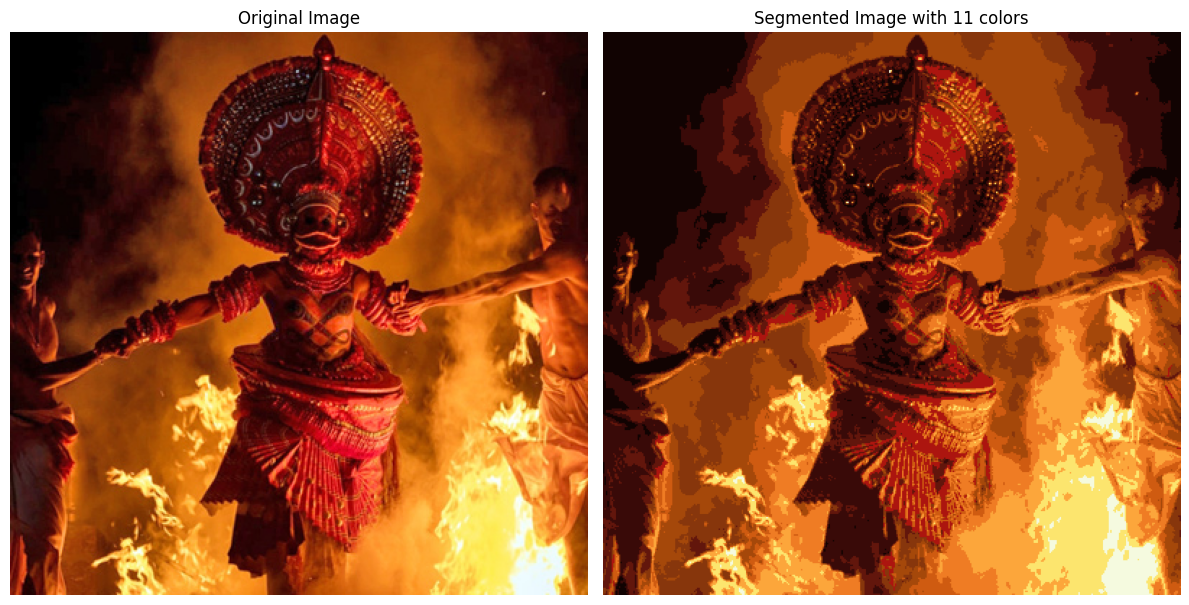

In [ ]:
# Choose k values to try
k_values = [4, 5, 6, 7, 8, 9, 10, 11]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pixels)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape).astype(np.uint8)

    # Step 4: Visualize original and segmented images for the current k
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Original Image
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    # Segmented Image
    ax[1].imshow(segmented_img)
    ax[1].set_title(f'Segmented Image with {k} colors')
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()